In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Preparation

In [2]:
data = pd.read_csv('D:\ML\Milestone1\Data_XY.csv')

In [3]:
x = data.iloc[:,:4186] #features
y = data['y'] # y ( h in our model)
x = np.array(x)

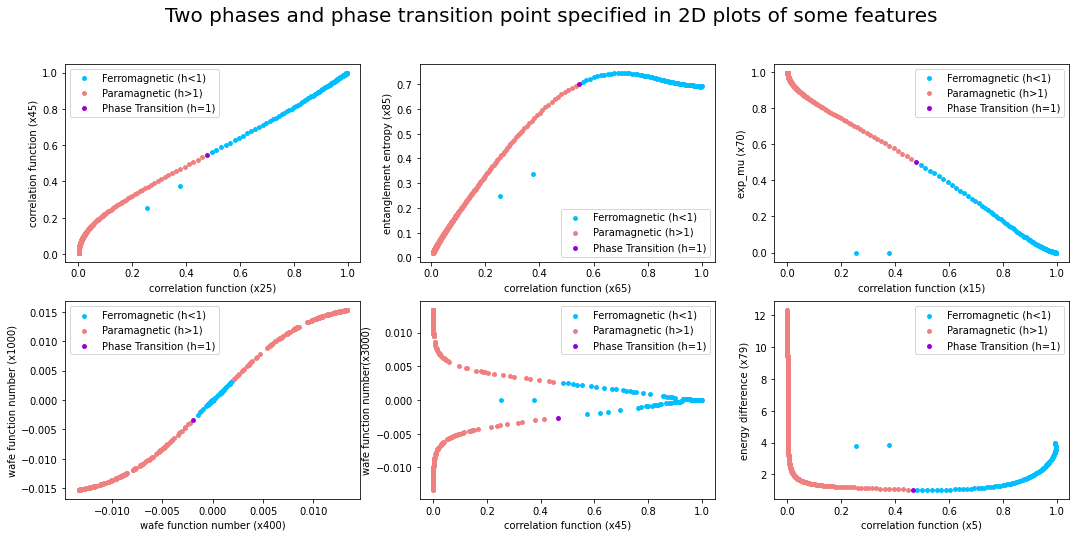

In [4]:
#two classes
fig, axes = plt.subplots(2, 3, figsize=(18, 8))

axes[0][0].scatter(x[y < 1][:,24], x[y < 1][:,39], color='deepskyblue', label='Ferromagnetic (h<1)',s=15) 
axes[0][0].scatter(x[y > 1][:,24], x[y > 1][:,39], color='lightcoral', label='Paramagnetic (h>1)',s=15)
axes[0][0].scatter(x[y == 1][:,24], x[y == 1][:,39], color='darkviolet', label='Phase Transition (h=1)',s=15)
axes[0][0].legend()
axes[0][0].set_xlabel('correlation function (x25)')
axes[0][0].set_ylabel('correlation function (x45)')
##
axes[1][0].scatter(x[y < 1][:,399], x[y < 1][:,999], color='deepskyblue', label='Ferromagnetic (h<1)',s=15) 
axes[1][0].scatter(x[y > 1][:,399], x[y > 1][:,999], color='lightcoral', label='Paramagnetic (h>1)',s=15)
axes[1][0].scatter(x[y == 1][:,399], x[y == 1][:,999], color='darkviolet', label='Phase Transition (h=1)',s=15)
axes[1][0].legend()
axes[1][0].set_xlabel('wafe function number (x400)')
axes[1][0].set_ylabel('wafe function number (x1000)')
##
axes[0][1].scatter(x[y < 1][:,64], x[y < 1][:,84], color='deepskyblue', label='Ferromagnetic (h<1)',s=15) 
axes[0][1].scatter(x[y > 1][:,64], x[y > 1][:,84], color='lightcoral', label='Paramagnetic (h>1)',s=15)
axes[0][1].scatter(x[y == 1][:,64], x[y == 1][:,84], color='darkviolet', label='Phase Transition (h=1)',s=15)
axes[0][1].legend()
axes[0][1].set_xlabel('correlation function (x65)')
axes[0][1].set_ylabel('entanglement entropy (x85)')
##
axes[1][1].scatter(x[y < 1][:,44], x[y < 1][:,2999], color='deepskyblue', label='Ferromagnetic (h<1)',s=15) 
axes[1][1].scatter(x[y > 1][:,44], x[y > 1][:,2999], color='lightcoral', label='Paramagnetic (h>1)',s=15)
axes[1][1].scatter(x[y == 1][:,44], x[y == 1][:,2999], color='darkviolet', label='Phase Transition (h=1)',s=15)
axes[1][1].legend()
axes[1][1].set_xlabel('correlation function (x45)')
axes[1][1].set_ylabel('wafe function number(x3000)')
axes[0][2].scatter(x[y < 1][:,14], x[y < 1][:,69], color='deepskyblue', label='Ferromagnetic (h<1)',s=15) 
axes[0][2].scatter(x[y > 1][:,14], x[y > 1][:,69], color='lightcoral', label='Paramagnetic (h>1)',s=15)
axes[0][2].scatter(x[y == 1][:,14], x[y == 1][:,69], color='darkviolet', label='Phase Transition (h=1)',s=15)
axes[0][2].legend()
axes[0][2].set_xlabel('correlation function (x15)')
axes[0][2].set_ylabel('exp_mu (x70)')
axes[1][2].scatter(x[y < 1][:,4], x[y < 1][:,78], color='deepskyblue', label='Ferromagnetic (h<1)',s=15) 
axes[1][2].scatter(x[y > 1][:,4], x[y > 1][:,78], color='lightcoral', label='Paramagnetic (h>1)',s=15)
axes[1][2].scatter(x[y == 1][:,4], x[y == 1][:,78], color='darkviolet', label='Phase Transition (h=1)',s=15)
axes[1][2].legend()
axes[1][2].set_xlabel('correlation function (x5)')
axes[1][2].set_ylabel('energy difference (x79)')
fig.suptitle(r"Two phases and phase transition point specified in 2D plots of some features",fontsize = 20)
plt.savefig('Two classes.jpg',dpi=500)

In [5]:
#split the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.25)  

# Model 1: KNN Regressor

## Training

In [6]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors=10)

In [7]:
%%time
KNN.fit(x_train,y_train)

Wall time: 275 ms


KNeighborsRegressor(n_neighbors=10)

In [8]:
%%time
y_pred_KNN = KNN.predict(x_test)

Wall time: 192 ms


## Evaluation

In [9]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
##
MSEScore = mean_squared_error(y_test,y_pred_KNN)
print(f"mean squared error metric: {MSEScore}")
print()
##
r2Score = r2_score(y_test,y_pred_KNN)
print(f"r^2 metric: {r2Score}")
print()
##
rmsScore = mean_squared_error(y_test, y_pred_KNN, squared=False)
print(f"root mean squared_error metric: {rmsScore}")
print()
##
MAEScore = mean_absolute_error(y_test, y_pred_KNN)
print(f"mean absolute error metric: {MAEScore}")

mean squared error metric: 0.019625909090909086

r^2 metric: 0.995549852575784

root mean squared_error metric: 0.1400925019082359

mean absolute error metric: 0.036340909090909035


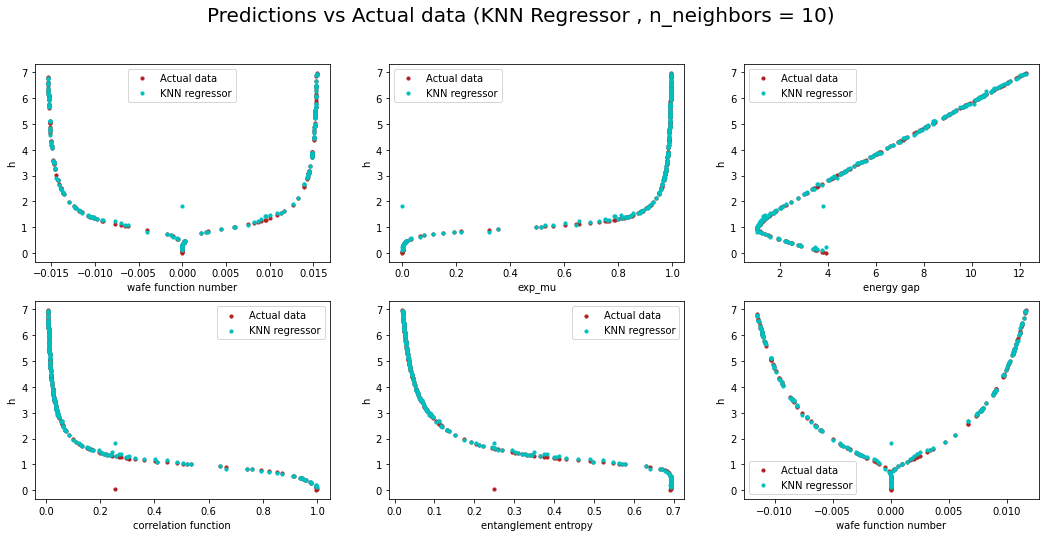

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes[0][0].scatter(x_test[:,300],y_test,s=10,label="Actual data",c='firebrick')
axes[0][0].scatter(x_test[:,300],y_pred_KNN,s=10, label="KNN regressor", c = 'c')
axes[0][0].legend()
axes[0][0].set_xlabel('wafe function number')
axes[0][0].set_ylabel('h')
##
axes[1][0].scatter(x_test[:,20],y_test,s=10,label="Actual data",c='firebrick')
axes[1][0].scatter(x_test[:,20],y_pred_KNN,s=10, label="KNN regressor", c = 'c')
axes[1][0].legend()
axes[1][0].set_xlabel('correlation function')
axes[1][0].set_ylabel('h')
##
axes[0][1].scatter(x_test[:,70],y_test,s=10,label="Actual data",c='firebrick')
axes[0][1].scatter(x_test[:,70],y_pred_KNN,s=10, label="KNN regressor", c = 'c')
axes[0][1].legend()
axes[0][1].set_xlabel('exp_mu')
axes[0][1].set_ylabel('h')
##
axes[1][1].scatter(x_test[:,88],y_test,s=10,label="Actual data",c='firebrick')
axes[1][1].scatter(x_test[:,88],y_pred_KNN,s=10, label="KNN regressor", c = 'c')
axes[1][1].legend()
axes[1][1].set_xlabel('entanglement entropy')
axes[1][1].set_ylabel('h')
##
axes[0][2].scatter(x_test[:,78],y_test,s=10,label="Actual data",c='firebrick')
axes[0][2].scatter(x_test[:,78],y_pred_KNN,s=10, label="KNN regressor", c = 'c')
axes[0][2].legend()
axes[0][2].set_xlabel('energy gap')
axes[0][2].set_ylabel('h')
##
axes[1][2].scatter(x_test[:,3500],y_test,s=10,label="Actual data",c='firebrick')
axes[1][2].scatter(x_test[:,3500],y_pred_KNN,s=10, label="KNN regressor", c = 'c')
axes[1][2].legend()
axes[1][2].set_xlabel('wafe function number')
axes[1][2].set_ylabel('h')
fig.suptitle("Predictions vs Actual data (KNN Regressor , n_neighbors = 10)",fontsize = 20)
plt.savefig('true_pred_knn.jpg',dpi=500)

## Tuning the complexity of KNN Regressor with validation curve

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 340 out of 340 | elapsed:  8.7min finished


Wall time: 8min 44s


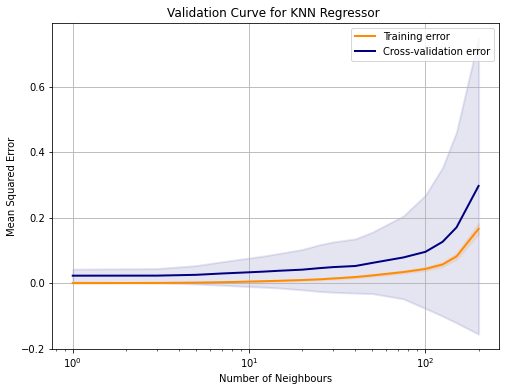

In [11]:
%%time
from sklearn.model_selection import validation_curve
k_list = [1,3,5,7,9, 12, 15, 20, 25, 30, 40, 50 , 75, 100, 125, 150 ,200]
train_scores, test_scores = validation_curve(KNeighborsRegressor(), x, y, 
                                              param_name="n_neighbors",
                                              param_range=k_list , cv=20, 
                                              scoring = 'neg_mean_squared_error',
                                              verbose=1)
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.grid()
plt.title("Validation Curve for KNN Regressor ")
plt.xlabel(r"Number of Neighbours")
plt.ylabel("Mean Squared Error")

lw = 2
plt.semilogx(k_list, train_scores_mean, label="Training error",
             color="darkorange", lw=lw)
plt.fill_between(k_list, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="darkorange", lw=lw)
plt.semilogx(k_list, test_scores_mean, label="Cross-validation error",
             color="navy", lw=lw)
plt.fill_between(k_list, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.savefig('knn_validation curve.jpg',dpi=500)

## Grid search to find the best Number of neighbors

In [13]:
from sklearn.model_selection import GridSearchCV
k_list = [1,2, 3, 5, 7, 10, 15, 20, 25, 30, 40, 50, 75, 100, 125, 150, 175, 200]
params = {'n_neighbors':k_list}
knn = KNeighborsRegressor()
knn_gs = GridSearchCV(knn, param_grid=params, verbose=1, cv=10, scoring='neg_mean_squared_error')
knn_gs.fit(x_train, y_train)
print("Best Number of Neighbours found on development set:")
print()
print( knn_gs.best_params_ )

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   48.7s finished


Best Number of Neighbours found on development set:

{'n_neighbors': 1}


In [14]:
gridsearch_knn = pd.DataFrame(knn_gs.cv_results_)
gridsearch_knn

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.197591,0.011094,0.040932,0.003800,1,{'n_neighbors': 1},-0.000445,-0.000296,-0.000875,-0.019879,-0.000443,-0.000352,-0.000175,-0.000304,-0.000294,-0.000479,-0.002354,0.005844,1
1,0.201477,0.011660,0.040035,0.002966,2,{'n_neighbors': 2},-0.000738,-0.000178,-0.001085,-0.020128,-0.000990,-0.000224,-0.000163,-0.000401,-0.000202,-0.000409,-0.002452,0.005901,2
2,0.195193,0.005888,0.042514,0.002494,3,{'n_neighbors': 3},-0.001176,-0.000232,-0.001288,-0.019944,-0.001498,-0.000389,-0.000312,-0.000501,-0.000274,-0.000618,-0.002623,0.005790,3
3,0.204347,0.005864,0.044840,0.002027,5,{'n_neighbors': 5},-0.001673,-0.000488,-0.001515,-0.020003,-0.001778,-0.000977,-0.000740,-0.000634,-0.000681,-0.000757,-0.002925,0.005710,4
4,0.198054,0.009193,0.046269,0.002535,7,{'n_neighbors': 7},-0.002315,-0.000850,-0.001488,-0.019835,-0.002528,-0.000755,-0.001282,-0.001132,-0.000904,-0.000996,-0.003209,0.005572,5
5,0.200003,0.008642,0.050644,0.003108,10,{'n_neighbors': 10},-0.004065,-0.001947,-0.002623,-0.020747,-0.004386,-0.001610,-0.001921,-0.001921,-0.001514,-0.001537,-0.004227,0.005593,6
6,0.191440,0.003728,0.051848,0.003722,15,{'n_neighbors': 15},-0.006214,-0.004077,-0.005361,-0.023984,-0.006743,-0.003758,-0.003814,-0.004184,-0.003193,-0.003923,-0.006525,0.005922,7
7,0.203103,0.008288,0.060442,0.003886,20,{'n_neighbors': 20},-0.010445,-0.005931,-0.008849,-0.026076,-0.009524,-0.005476,-0.004475,-0.007416,-0.004710,-0.008569,-0.009147,0.005976,8
8,0.191717,0.007681,0.061788,0.005559,25,{'n_neighbors': 25},-0.013860,-0.009480,-0.010956,-0.028468,-0.011125,-0.008675,-0.005246,-0.011816,-0.006467,-0.012144,-0.011824,0.006082,9
9,0.205588,0.007807,0.073363,0.004946,30,{'n_neighbors': 30},-0.016892,-0.013738,-0.015365,-0.033956,-0.014210,-0.012515,-0.007274,-0.015644,-0.010798,-0.017026,-0.015742,0.006692,10


## Learning Curve

In [42]:
def plot_learning_curve(estimator, X, y, axes=None, ylim=None, cv=None,n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(30,10))

    axes[0].set_title("Learning Curve")
    
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Mean Squared Error")


    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       scoring = 'neg_mean_squared_error',
                       return_times=True)
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training error")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation error")
    axes[0].legend(loc="best")


    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit times (s)")
    axes[1].set_title("Scalability of the model")


    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit times (s)")
    axes[2].set_ylabel("Mean Squared Error")
    axes[2].set_title("Performance of the model")


    return plt

Wall time: 3min 31s


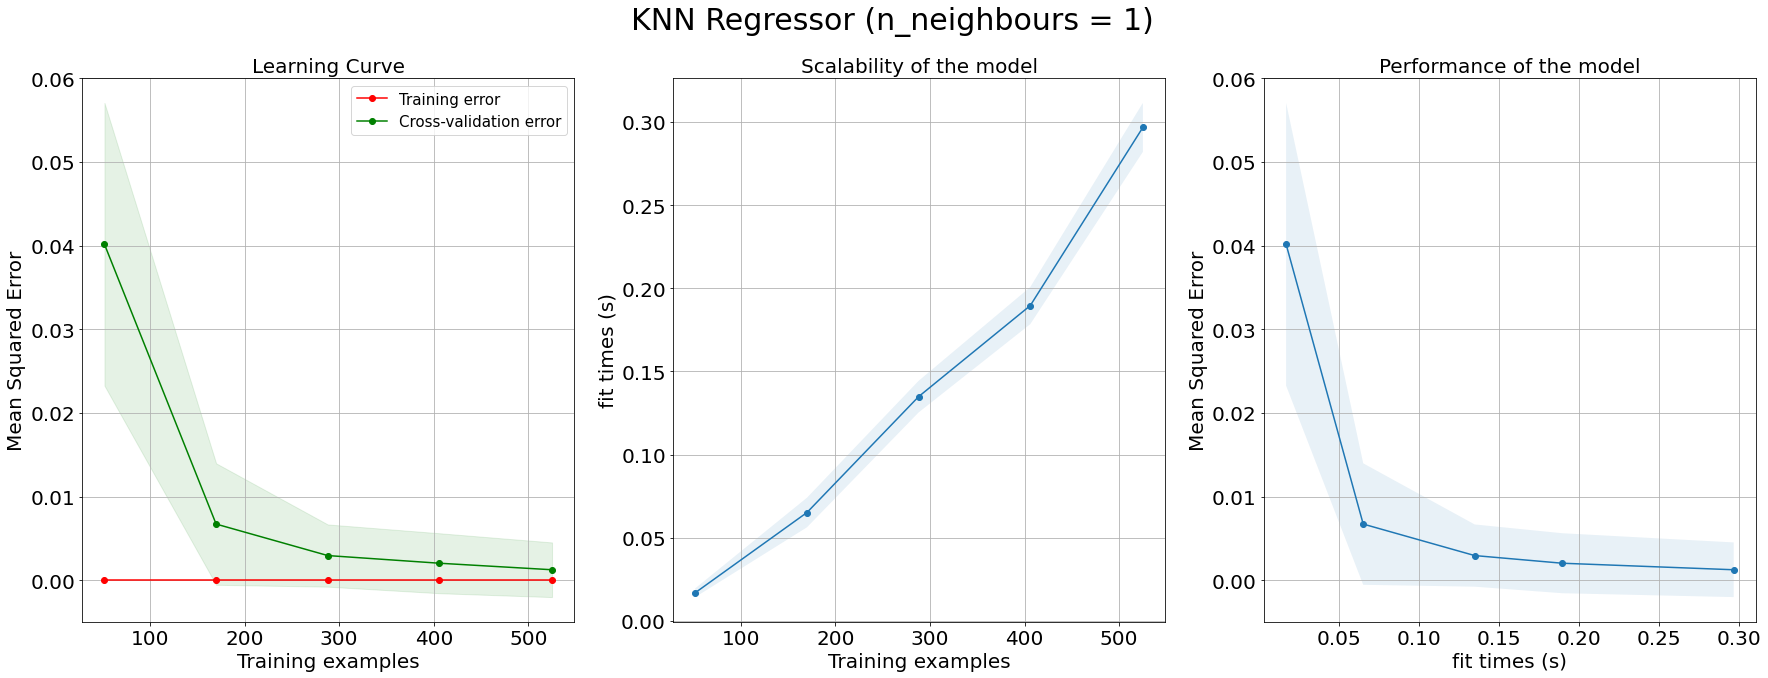

In [19]:
%%time
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 25% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.25, random_state=0)

estimator = KNeighborsRegressor(n_neighbors=1)
plot_learning_curve(estimator, X = x , y=y ,cv=cv)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.rc('axes',labelsize=20)
plt.rc('axes',titlesize=20)
plt.rc('legend',fontsize=15)
plt.suptitle(r"KNN Regressor (n_neighbours = 1)",fontsize=30)
plt.savefig('knn_learning_curves.jpg',dpi=500)

## Final fitting with best hyperparameters

In [20]:
KNN = KNeighborsRegressor(n_neighbors=1)

In [21]:
%%time
KNN.fit(x_train,y_train)

Wall time: 272 ms


KNeighborsRegressor(n_neighbors=1)

In [22]:
%%time
y_pred_KNN = KNN.predict(x_test)

Wall time: 130 ms


In [23]:
MSEScore = mean_squared_error(y_test,y_pred_KNN)
print(f"mean squared error metric: {MSEScore}")
print()
##
r2Score = r2_score(y_test,y_pred_KNN)
print(f"r^2 metric: {r2Score}")
print()
##
rmsScore = mean_squared_error(y_test, y_pred_KNN, squared=False)
print(f"root mean squared_error metric: {rmsScore}")
print()
##
MAEScore = mean_absolute_error(y_test, y_pred_KNN)
print(f"mean absolute error metric: {MAEScore}")

mean squared error metric: 0.0004840909090909094

r^2 metric: 0.9998902330637425

root mean squared_error metric: 0.02200206601869264

mean absolute error metric: 0.015909090909090904


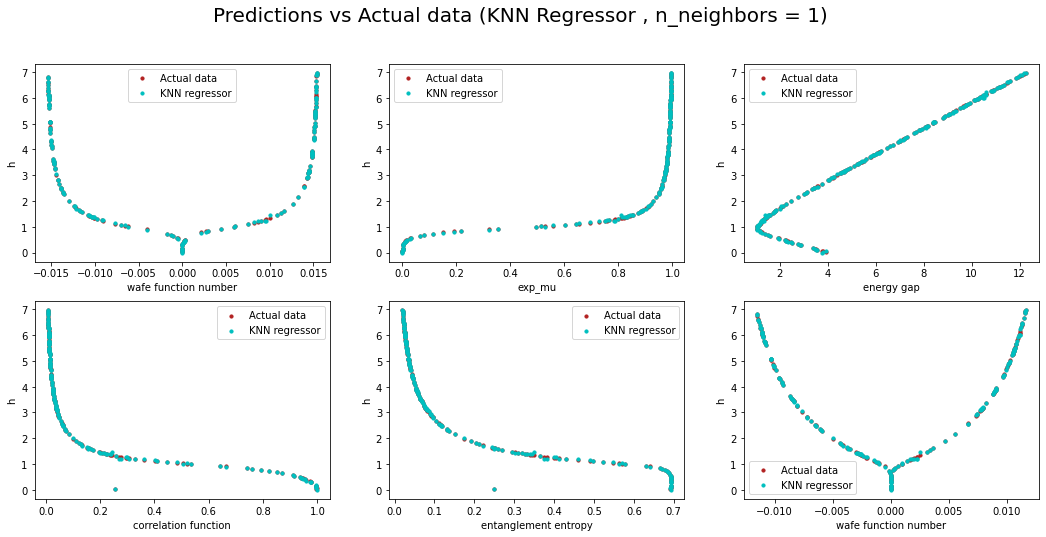

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes[0][0].scatter(x_test[:,300],y_test,s=10,label="Actual data",c='firebrick')
axes[0][0].scatter(x_test[:,300],y_pred_KNN,s=10, label="KNN regressor", c = 'c')
axes[0][0].legend()
axes[0][0].set_xlabel('wafe function number')
axes[0][0].set_ylabel('h')
##
axes[1][0].scatter(x_test[:,20],y_test,s=10,label="Actual data",c='firebrick')
axes[1][0].scatter(x_test[:,20],y_pred_KNN,s=10, label="KNN regressor", c = 'c')
axes[1][0].legend()
axes[1][0].set_xlabel('correlation function')
axes[1][0].set_ylabel('h')
##
axes[0][1].scatter(x_test[:,70],y_test,s=10,label="Actual data",c='firebrick')
axes[0][1].scatter(x_test[:,70],y_pred_KNN,s=10, label="KNN regressor", c = 'c')
axes[0][1].legend()
axes[0][1].set_xlabel('exp_mu')
axes[0][1].set_ylabel('h')
##
axes[1][1].scatter(x_test[:,88],y_test,s=10,label="Actual data",c='firebrick')
axes[1][1].scatter(x_test[:,88],y_pred_KNN,s=10, label="KNN regressor", c = 'c')
axes[1][1].legend()
axes[1][1].set_xlabel('entanglement entropy')
axes[1][1].set_ylabel('h')
##
axes[0][2].scatter(x_test[:,78],y_test,s=10,label="Actual data",c='firebrick')
axes[0][2].scatter(x_test[:,78],y_pred_KNN,s=10, label="KNN regressor", c = 'c')
axes[0][2].legend()
axes[0][2].set_xlabel('energy gap')
axes[0][2].set_ylabel('h')
##
axes[1][2].scatter(x_test[:,3500],y_test,s=10,label="Actual data",c='firebrick')
axes[1][2].scatter(x_test[:,3500],y_pred_KNN,s=10, label="KNN regressor", c = 'c')
axes[1][2].legend()
axes[1][2].set_xlabel('wafe function number')
axes[1][2].set_ylabel('h')
fig.suptitle("Predictions vs Actual data (KNN Regressor , n_neighbors = 1)",fontsize = 20)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.rc('axes',labelsize=10)
plt.rc('axes',titlesize=10)
plt.rc('legend',fontsize=10)
plt.savefig('true_pred_knn_best.jpg',dpi=500)

# Model 2: DecisionTree Regressor

## Training

In [27]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=5)

In [28]:
%%time
DT.fit(x_train,y_train)

Wall time: 472 ms


DecisionTreeRegressor(max_depth=5)

In [29]:
%%time
y_pred_DT = DT.predict(x_test)

Wall time: 4.96 ms


## Evaluation

In [30]:
MSEScore = mean_squared_error(y_test, y_pred_DT)
print(f"mean squared_error metric: {MSEScore}")
print()
##
r2Score = r2_score(y_test, y_pred_DT)
print(f"r^2 metric: {r2Score}")
print()
##
rmsScore = mean_squared_error(y_test, y_pred_DT, squared=False)
print(f"root mean squared_error metric: {rmsScore}")
print()
##
MAEScore = mean_absolute_error(y_test, y_pred_DT)
print(f"mean absolute error metric: {MAEScore}")

mean squared_error metric: 0.004963930297762089

r^2 metric: 0.9988744357509123

root mean squared_error metric: 0.07045516516027828

mean absolute error metric: 0.060791600236815985


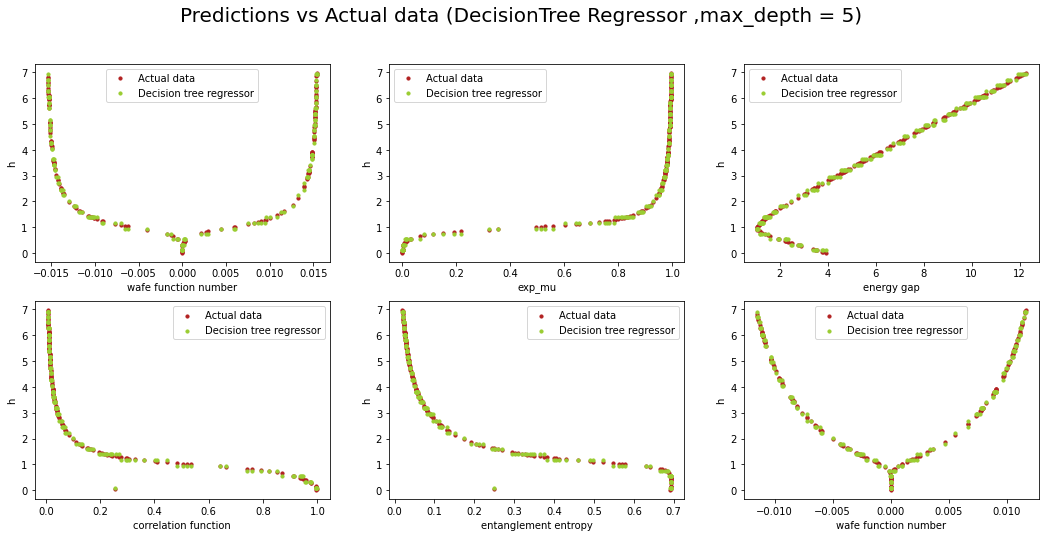

In [33]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes[0][0].scatter(x_test[:,300],y_test,s=10,label="Actual data",c='firebrick')
axes[0][0].scatter(x_test[:,300],y_pred_DT,s=10, label="Decision tree regressor", c = 'yellowgreen')
axes[0][0].legend()
axes[0][0].set_xlabel('wafe function number')
axes[0][0].set_ylabel('h')
axes[1][0].scatter(x_test[:,20],y_test,s=10,label="Actual data",c='firebrick')
axes[1][0].scatter(x_test[:,20],y_pred_DT,s=10, label="Decision tree regressor", c = 'yellowgreen')
axes[1][0].legend()
axes[1][0].set_xlabel('correlation function')
axes[1][0].set_ylabel('h')
axes[0][1].scatter(x_test[:,70],y_test,s=10,label="Actual data",c='firebrick')
axes[0][1].scatter(x_test[:,70],y_pred_DT,s=10, label="Decision tree regressor", c = 'yellowgreen')
axes[0][1].legend()
axes[0][1].set_xlabel('exp_mu')
axes[0][1].set_ylabel('h')
axes[1][1].scatter(x_test[:,88],y_test,s=10,label="Actual data",c='firebrick')
axes[1][1].scatter(x_test[:,88],y_pred_DT,s=10, label="Decision tree regressor", c = 'yellowgreen')
axes[1][1].legend()
axes[1][1].set_xlabel('entanglement entropy')
axes[1][1].set_ylabel('h')
axes[0][2].scatter(x_test[:,78],y_test,s=10,label="Actual data",c='firebrick')
axes[0][2].scatter(x_test[:,78],y_pred_DT,s=10, label="Decision tree regressor", c = 'yellowgreen')
axes[0][2].legend()
axes[0][2].set_xlabel('energy gap')
axes[0][2].set_ylabel('h')
axes[1][2].scatter(x_test[:,3500],y_test,s=10,label="Actual data",c='firebrick')
axes[1][2].scatter(x_test[:,3500],y_pred_DT,s=10, label="Decision tree regressor", c = 'yellowgreen')
axes[1][2].legend()
axes[1][2].set_xlabel('wafe function number')
axes[1][2].set_ylabel('h')
fig.suptitle("Predictions vs Actual data (DecisionTree Regressor ,max_depth = 5)",fontsize = 20)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.rc('axes',labelsize=10)
plt.rc('axes',titlesize=10)
plt.rc('legend',fontsize=10)
plt.savefig('true_pred_dt.jpg',dpi=500)

## Tuning the complexity of DecisionTree Regressor with validation curve

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 440 out of 440 | elapsed:  2.0min finished


Wall time: 2min


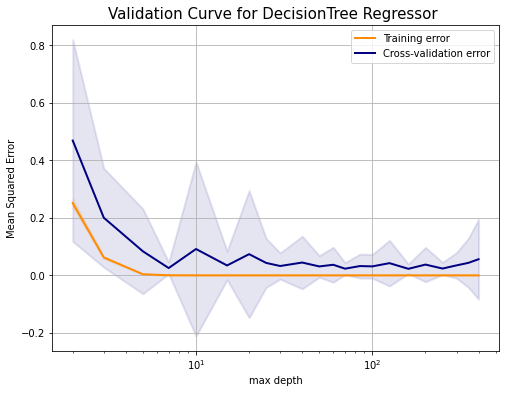

In [36]:
%%time
from sklearn.model_selection import validation_curve
depth_list = [2,3,5,7,10,15,20,25,30,40,50,60,70,85,100,125,160,200,250,300,350,400]
train_scores, test_scores = validation_curve(DecisionTreeRegressor(), x, y, 
                                              param_name="max_depth",
                                              param_range=depth_list  , cv=20, 
                                              scoring = 'neg_mean_squared_error',
                                              verbose=1, n_jobs=-1
                                             )
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.grid()
plt.title("Validation Curve for DecisionTree Regressor ",fontsize = 15)
plt.xlabel(r"max depth")
plt.ylabel("Mean Squared Error")

lw = 2
plt.semilogx(depth_list, train_scores_mean, label="Training error",
             color="darkorange", lw=lw)
plt.fill_between(depth_list, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="darkorange", lw=lw)
plt.semilogx(depth_list, test_scores_mean, label="Cross-validation error",
             color="navy", lw=lw)
plt.fill_between(depth_list, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.rc('axes',labelsize=20)
plt.rc('axes',titlesize=20)
plt.rc('legend',fontsize=15)
plt.savefig('DT_validation curve.jpg',dpi=500)

## Grid search to find the best hyperparameters

In [37]:
parameters = [{'splitter': ['best','random'], 'max_depth': [5,7,10,15,20,25,30,40,50,60,70,85,100]}]

In [38]:
DT = DecisionTreeRegressor()
DT_gs = GridSearchCV(DT, parameters, scoring= 'neg_mean_squared_error', cv=10)
DT_gs.fit(x_train,y_train)
print("Best parameters set found on development set:")
print()
print( DT_gs.best_params_ )

Best parameters set found on development set:

{'max_depth': 100, 'splitter': 'best'}


In [39]:
gridsearch_dt = pd.DataFrame(DT_gs.cv_results_)
gridsearch_dt = gridsearch_dt.drop(columns=['mean_score_time','std_score_time','params','split0_test_score','split1_test_score','split2_test_score','split3_test_score','split4_test_score'])
gridsearch_dt

,mean_fit_time,std_fit_time,param_max_depth,param_splitter,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.382716,0.016241,5,best,-0.005246,-0.004855,-0.004753,-0.004387,-0.005006,-0.005245,0.000581,25
1,0.091709,0.006271,5,random,-0.005001,-0.003320,-0.005806,-0.004536,-0.005921,-0.006812,0.005146,26
2,0.481661,0.039868,7,best,-0.000887,-0.000536,-0.000985,-0.000837,-0.000811,-0.001055,0.000447,10
3,0.135968,0.008951,7,random,-0.000663,-0.000591,-0.000740,-0.000711,-0.001027,-0.003119,0.006883,20
4,0.571118,0.019574,10,best,-0.000606,-0.000160,-0.000650,-0.000406,-0.000579,-0.000620,0.000345,2
5,0.205909,0.011659,10,random,-0.000262,-0.000281,-0.000444,-0.000552,-0.000344,-0.003305,0.008510,21
6,0.566657,0.026853,15,best,-0.000467,-0.000169,-0.000506,-0.000512,-0.000579,-0.002532,0.005980,17
7,0.216959,0.014357,15,random,-0.000265,-0.000258,-0.000319,-0.000310,-0.000454,-0.002709,0.006717,19
8,0.594327,0.025982,20,best,-0.000606,-0.000246,-0.000665,-0.000392,-0.000531,-0.000687,0.000444,6
9,0.203397,0.003304,20,random,-0.000406,-0.000392,-0.000498,-0.000454,-0.000469,-0.004362,0.011412,24


Wall time: 2min 53s


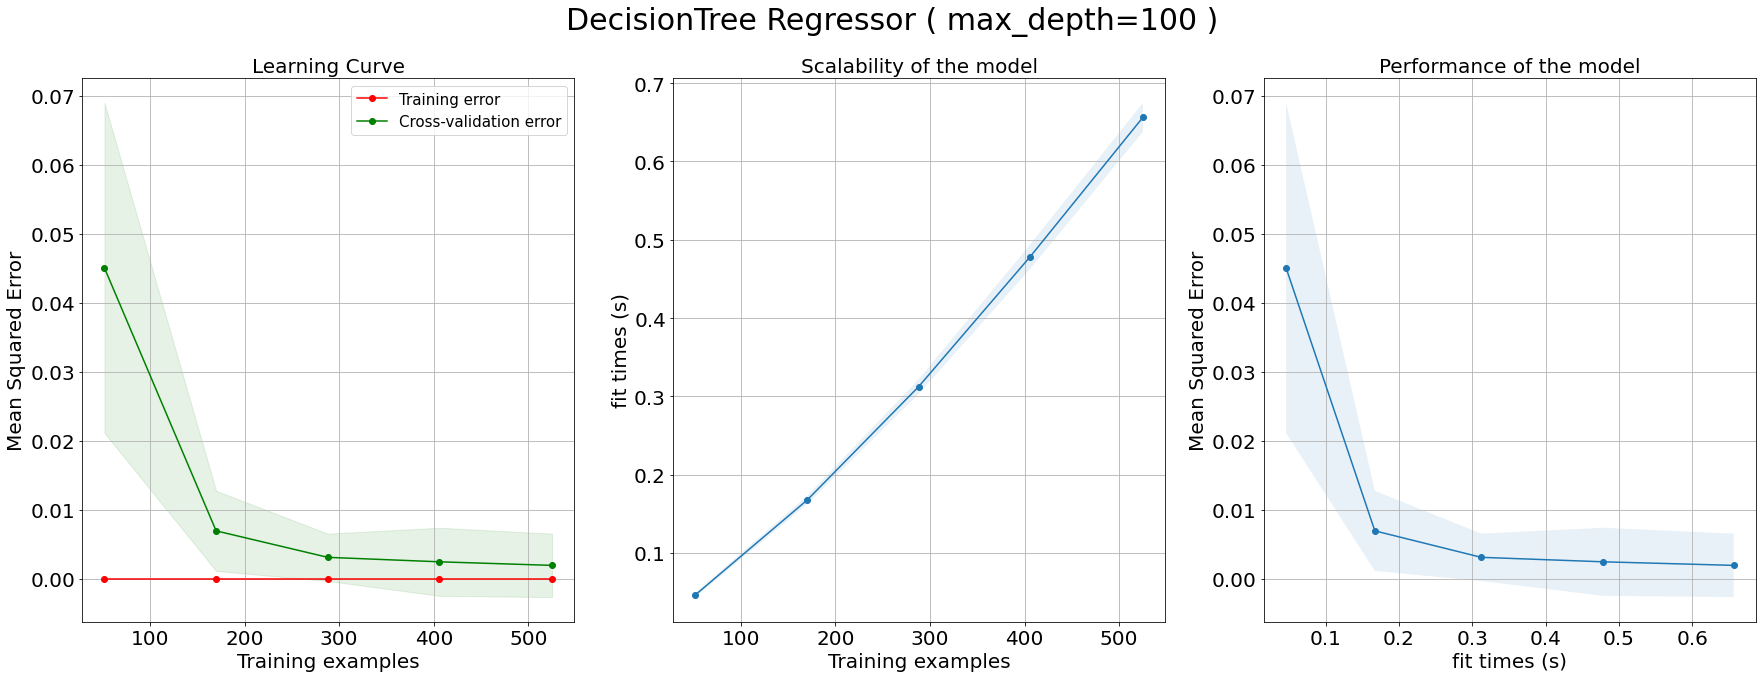

In [43]:
%%time
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 25% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.25, random_state=0)

estimator = DecisionTreeRegressor(splitter='best',max_depth=100)
plot_learning_curve(estimator, X = x , y=y ,cv=cv)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.rc('axes',labelsize=20)
plt.rc('axes',titlesize=20)
plt.rc('legend',fontsize=15)
plt.suptitle(r"DecisionTree Regressor ( max_depth=100 )",fontsize=30)
plt.savefig('DecisionTree_learning_curves.jpg',dpi=500)

## Final fitting with best hyperparameters

In [44]:
DT = DecisionTreeRegressor(splitter='best',max_depth=100)

In [45]:
%%time
DT.fit(x_train,y_train)

Wall time: 698 ms


DecisionTreeRegressor(max_depth=100)

In [46]:
%%time
y_pred_DT = DT.predict(x_test)

Wall time: 3.95 ms


In [47]:
MSEScore = mean_squared_error(y_test, y_pred_DT)
print(f"mean squared_error metric: {MSEScore}")
print()
##
r2Score = r2_score(y_test, y_pred_DT)
print(f"r^2 metric: {r2Score}")
print()
##
rmsScore = mean_squared_error(y_test, y_pred_DT, squared=False)
print(f"root mean squared_error metric: {rmsScore}")
print()
##
MAEScore = mean_absolute_error(y_test, y_pred_DT)
print(f"mean absolute error metric: {MAEScore}")

mean squared_error metric: 0.0004573863636363643

r^2 metric: 0.9998962882820571

root mean squared_error metric: 0.021386593081563137

mean absolute error metric: 0.01596590909090911


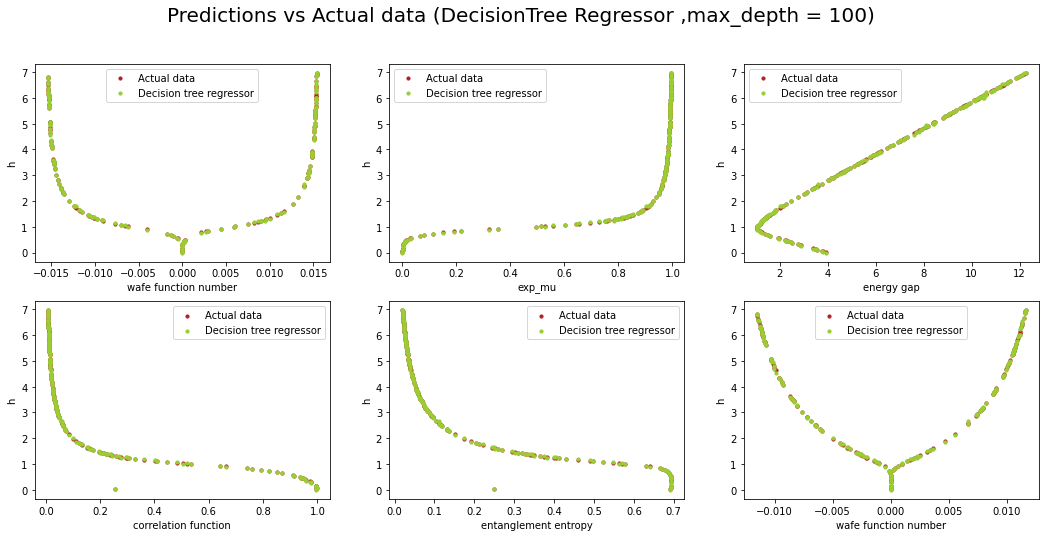

In [50]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes[0][0].scatter(x_test[:,300],y_test,s=10,label="Actual data",c='firebrick')
axes[0][0].scatter(x_test[:,300],y_pred_DT,s=10, label="Decision tree regressor", c = 'yellowgreen')
axes[0][0].legend()
axes[0][0].set_xlabel('wafe function number')
axes[0][0].set_ylabel('h')
axes[1][0].scatter(x_test[:,20],y_test,s=10,label="Actual data",c='firebrick')
axes[1][0].scatter(x_test[:,20],y_pred_DT,s=10, label="Decision tree regressor", c = 'yellowgreen')
axes[1][0].legend()
axes[1][0].set_xlabel('correlation function')
axes[1][0].set_ylabel('h')
axes[0][1].scatter(x_test[:,70],y_test,s=10,label="Actual data",c='firebrick')
axes[0][1].scatter(x_test[:,70],y_pred_DT,s=10, label="Decision tree regressor", c = 'yellowgreen')
axes[0][1].legend()
axes[0][1].set_xlabel('exp_mu')
axes[0][1].set_ylabel('h')
axes[1][1].scatter(x_test[:,88],y_test,s=10,label="Actual data",c='firebrick')
axes[1][1].scatter(x_test[:,88],y_pred_DT,s=10, label="Decision tree regressor", c = 'yellowgreen')
axes[1][1].legend()
axes[1][1].set_xlabel('entanglement entropy')
axes[1][1].set_ylabel('h')
axes[0][2].scatter(x_test[:,78],y_test,s=10,label="Actual data",c='firebrick')
axes[0][2].scatter(x_test[:,78],y_pred_DT,s=10, label="Decision tree regressor", c = 'yellowgreen')
axes[0][2].legend()
axes[0][2].set_xlabel('energy gap')
axes[0][2].set_ylabel('h')
axes[1][2].scatter(x_test[:,3500],y_test,s=10,label="Actual data",c='firebrick')
axes[1][2].scatter(x_test[:,3500],y_pred_DT,s=10, label="Decision tree regressor", c = 'yellowgreen')
axes[1][2].legend()
axes[1][2].set_xlabel('wafe function number')
axes[1][2].set_ylabel('h')
fig.suptitle("Predictions vs Actual data (DecisionTree Regressor ,max_depth = 100)",fontsize = 20)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.rc('axes',labelsize=10)
plt.rc('axes',titlesize=10)
plt.rc('legend',fontsize=10)
plt.savefig('true_pred_dt_best.jpg',dpi=500)

# Model 3

# Model 4

# Model 5

# Model 6